In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# sklearn: data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# sklearn: train model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report

# sklearn classifiers
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets, ensemble, model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [49]:
#Loading training and test data and concatanate


training_data = pd.read_csv('UNSW_NB15_training-set.csv')
testing_data = pd.read_csv('UNSW_NB15_testing-set.csv')

training_data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [50]:
testing_data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [51]:
concatenated_data = pd.concat([training_data, testing_data])
concatenated_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  sin

In [52]:
unique_categories = concatenated_data['attack_cat'].unique()

unique_categories

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [53]:
unique_labels = concatenated_data['label'].unique()

unique_labels

array([0, 1], dtype=int64)

In [54]:
concatenated_data.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [55]:
useful_data = concatenated_data.dropna()

In [56]:
useful_data.shape

(257673, 45)

<AxesSubplot:>

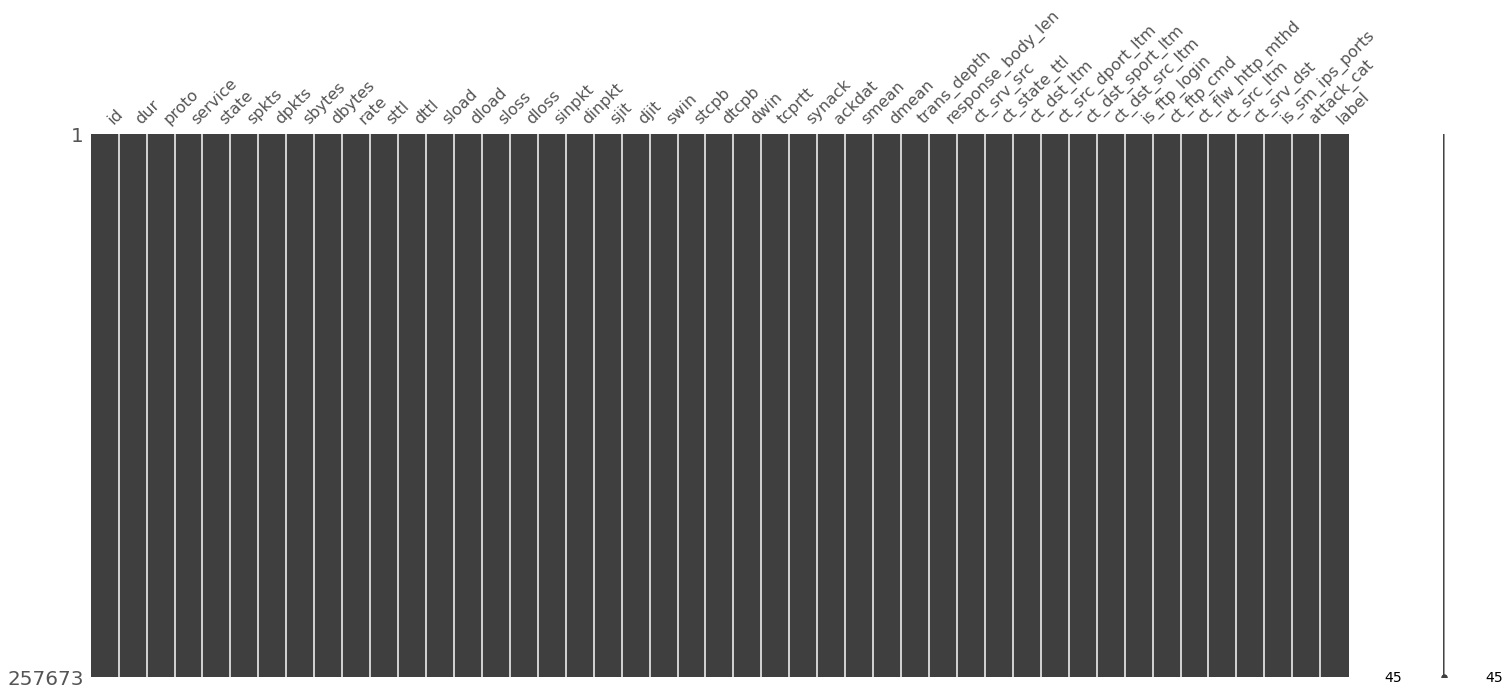

In [57]:
import missingno
import pickle

missingno.matrix(useful_data)

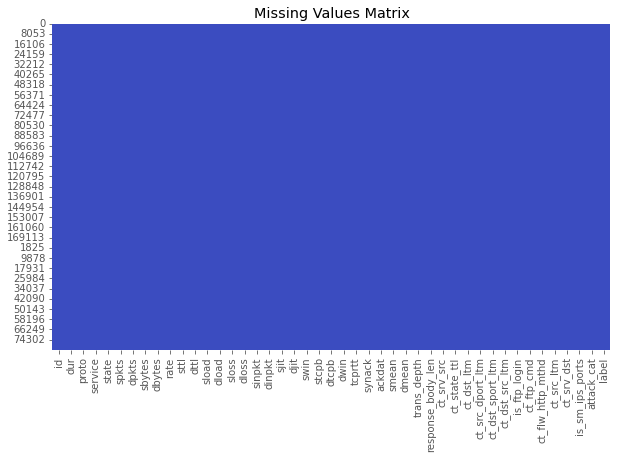

In [58]:
plt.figure(figsize=(10,6))
sns.heatmap(useful_data.isnull(), cbar=False, cmap='coolwarm')
plt.title('Missing Values Matrix')
plt.show()

In [59]:
useful_data.describe(include="all")

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
count,257673.000000,257673.000000,257673,257673,257673,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673,257673.000000
unique,NaN,NaN,133,13,11,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,tcp,-,FIN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN
freq,NaN,NaN,123041,141321,117164,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93000,NaN
mean,72811.823858,1.246715,NaN,NaN,NaN,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,...,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,NaN,0.639077
std,48929.917641,5.974305,NaN,NaN,NaN,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,...,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,NaN,0.480269
min,1.000000,0.000000,NaN,NaN,NaN,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,NaN,0.000000
25%,32210.000000,0.000008,NaN,NaN,NaN,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,...,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,NaN,0.000000
50%,64419.000000,0.004285,NaN,NaN,NaN,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,...,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,NaN,1.000000
75%,110923.000000,0.685777,NaN,NaN,NaN,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,...,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,NaN,1.000000


<AxesSubplot:>

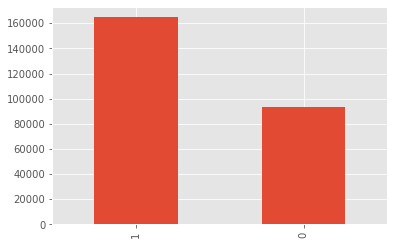

In [60]:
useful_data['label'].value_counts().plot.bar()

<AxesSubplot:>

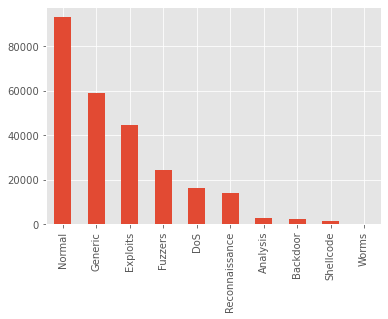

In [61]:
useful_data['attack_cat'].value_counts().plot.bar()

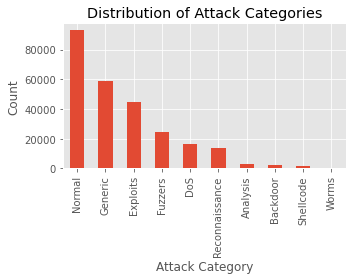

In [62]:
plt.figure(figsize=(5, 4))
useful_data['attack_cat'].value_counts().plot.bar()
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.title('Distribution of Attack Categories')
plt.tight_layout()
plt.show()

In [63]:
useful_data['label'].value_counts(normalize=True)

1    0.639077
0    0.360923
Name: label, dtype: float64

## Dataset Balance Ratio

In [64]:
labels = useful_data['label']
attacks = useful_data['attack_cat']

Distributions of labels: 0.6:1 (93000/164673)


Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


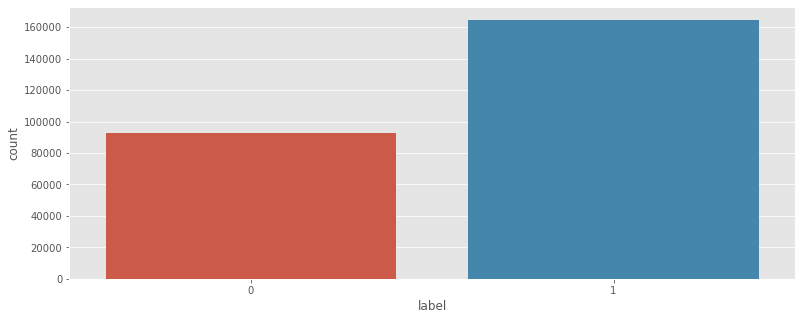

In [65]:
def AttackLabel_ratio(input):
    
    #Calculate ratio
    
    unique, count = np.unique(input, return_counts=True)
    ratio = round(count[0]/count[1], 1)
    return f'{ratio}:1 ({count[0]}/{count[1]})'

print('Distributions of labels:', AttackLabel_ratio(labels))
plt.figure(figsize=(13,5))
sns.countplot(labels,label="Sum")
plt.show()

Distribution of attack types: 1.1:1 (2677/2329)


Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


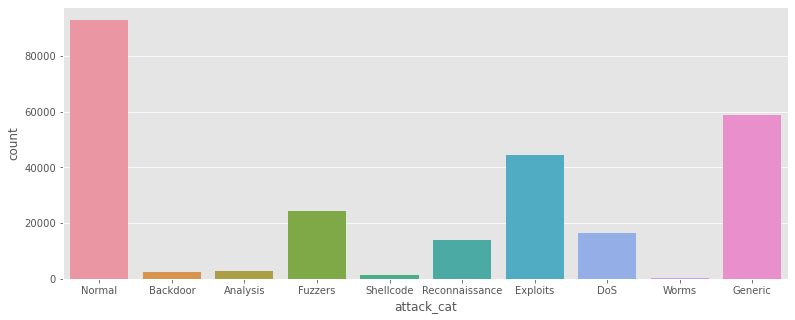

In [66]:
print('Distribution of attack types:', AttackLabel_ratio(attacks))
plt.figure(figsize=(13,5))
sns.countplot(attacks,label="Sum")
plt.show()

### Encoding categorical features Encoding categorical features using LabelEncoder.

In [67]:
# Select categorical columns
categorical_columns = useful_data.select_dtypes(include=['object']).columns
# Encode categorical features with LabelEncoder
encoding = LabelEncoder()
useful_data[categorical_columns] = useful_data[categorical_columns].apply(encoding.fit_transform)

In [68]:
useful_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,113,0,4,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,6,0
1,2,0.649902,113,0,4,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,6,0
2,3,1.623129,113,0,4,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,6,0
3,4,1.681642,113,3,4,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,6,0
4,5,0.449454,113,0,4,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,6,0


# Data Correlation

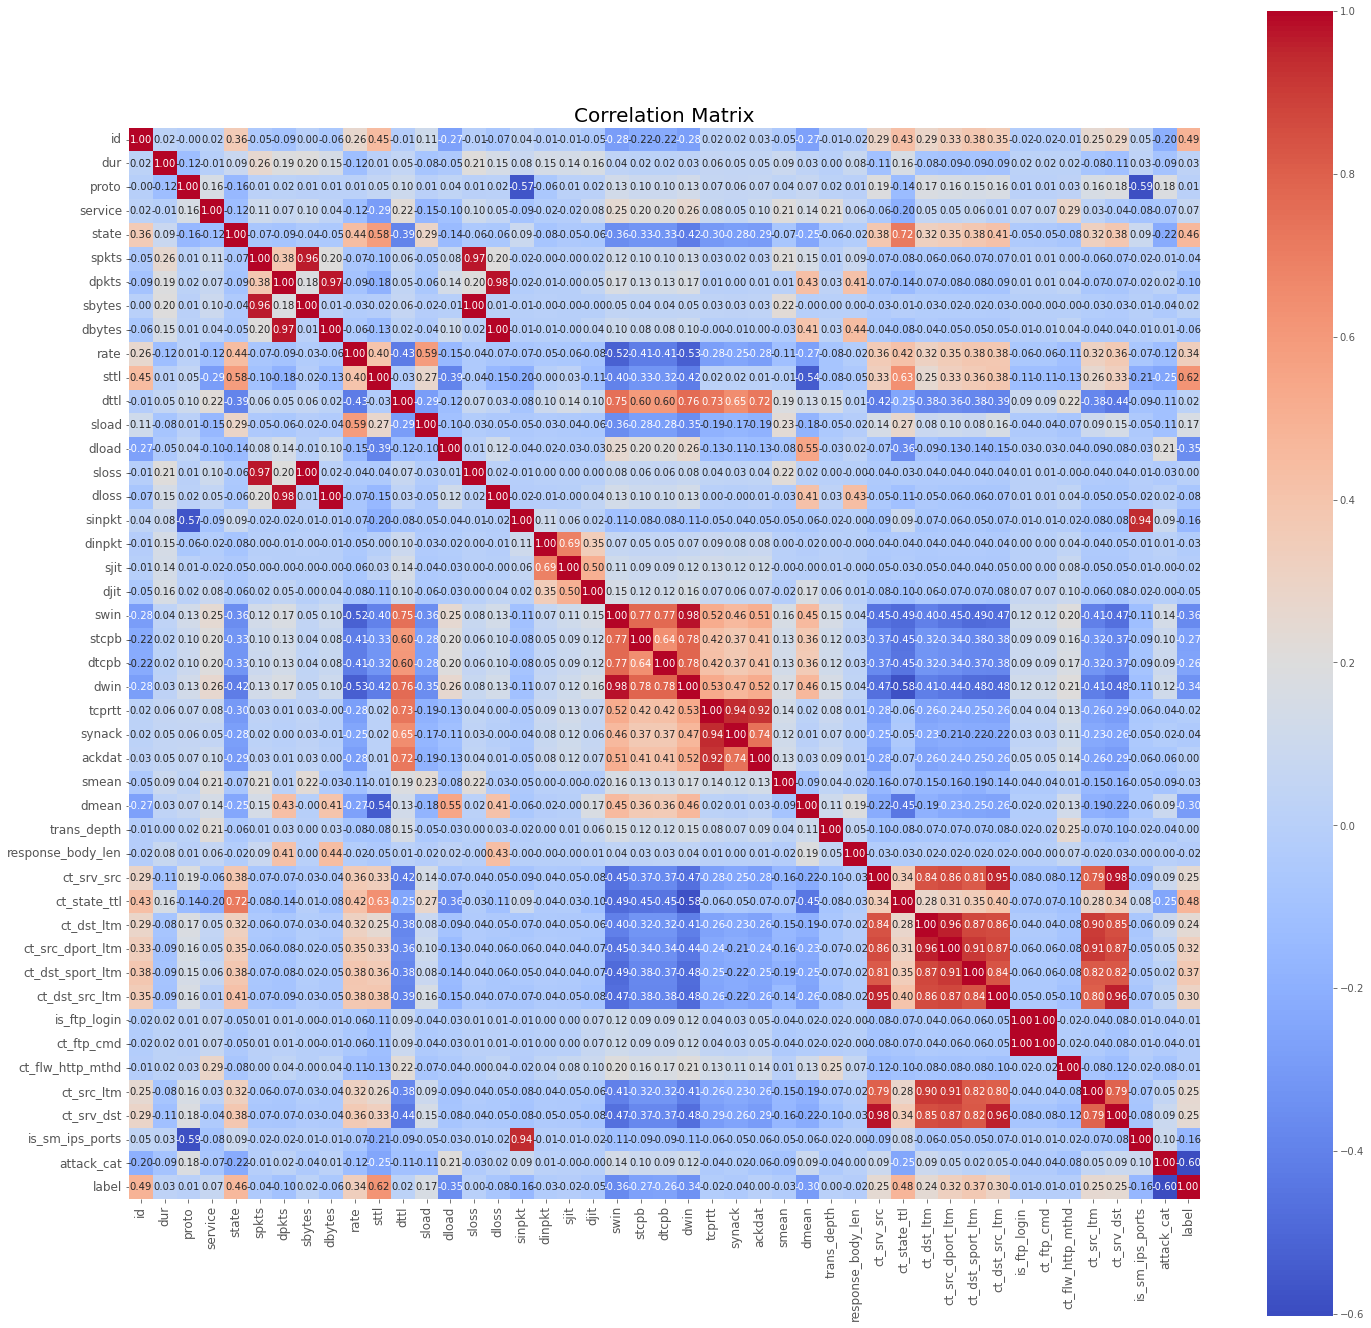

In [69]:
fig = plt.figure(figsize=(24, 24))
sns.heatmap(useful_data.corr(), cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

fig.savefig('Features with Corelation.png')

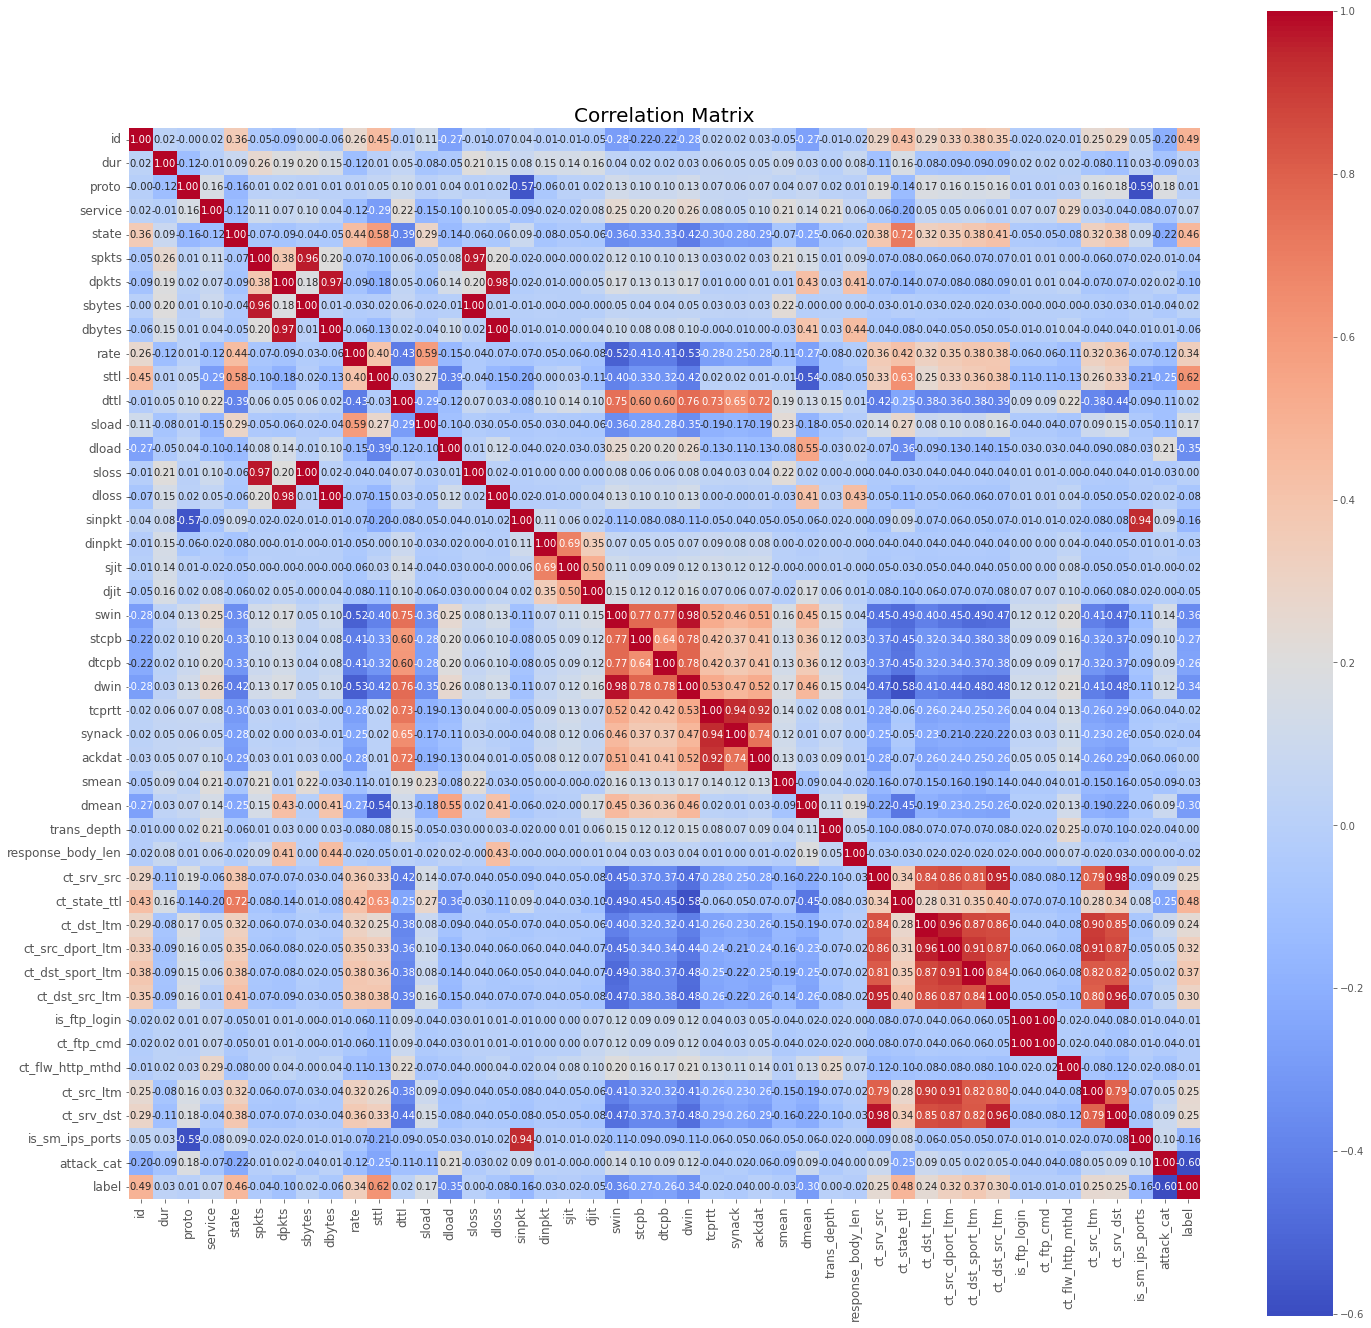

In [70]:
plt.figure(figsize=(24, 24))
sns.heatmap(useful_data.corr(), cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

fig = plt.gcf()
fig.savefig('Features with Corelation.png', dpi=300)

In [71]:
corr_matrix = useful_data.corr().abs()
correlated_vars = corr_matrix[corr_matrix > 0.98].stack().reset_index()
correlated_vars = correlated_vars[correlated_vars['level_0'] < correlated_vars['level_1']]
correlated_vars.columns = ['Var1', 'Var2', 'Corr']
correlated_vars = correlated_vars.sort_values(by='Corr', ascending=False)
print(correlated_vars)

          Var1          Var2      Corr
45  ct_ftp_cmd  is_ftp_login  0.998855
10      dbytes         dloss  0.996711
8       sbytes         sloss  0.995772
28        dwin          swin  0.980458


In [72]:
corr_matrix = useful_data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.98)]
useful_data = useful_data.drop(columns=to_drop)

In [73]:
useful_data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,113,0,4,6,4,258,172,74.087490,...,1,1,1,0,0,1,1,0,6,0
1,2,0.649902,113,0,4,14,38,734,42014,78.473372,...,1,1,2,0,0,1,6,0,6,0
2,3,1.623129,113,0,4,8,16,364,13186,14.170161,...,1,1,3,0,0,2,6,0,6,0
3,4,1.681642,113,3,4,12,12,628,770,13.677108,...,1,1,3,1,0,2,1,0,6,0
4,5,0.449454,113,0,4,10,6,534,268,33.373826,...,2,1,40,0,0,2,39,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,119,0,5,2,0,104,0,200000.005100,...,1,1,2,0,0,2,1,0,6,0
82328,82329,1.106101,113,0,4,20,8,18062,354,24.410067,...,1,1,1,0,0,3,2,0,6,0
82329,82330,0.000000,6,0,5,1,0,46,0,0.000000,...,1,1,1,0,0,1,1,1,6,0
82330,82331,0.000000,6,0,5,1,0,46,0,0.000000,...,1,1,1,0,0,1,1,1,6,0


In [74]:
useful_data = useful_data.drop(axis=1, columns=['id','attack_cat'])

In [75]:
useful_data

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.121478,113,0,4,6,4,258,172,74.087490,252,...,1,1,1,1,0,0,1,1,0,0
1,0.649902,113,0,4,14,38,734,42014,78.473372,62,...,1,1,1,2,0,0,1,6,0,0
2,1.623129,113,0,4,8,16,364,13186,14.170161,62,...,2,1,1,3,0,0,2,6,0,0
3,1.681642,113,3,4,12,12,628,770,13.677108,62,...,2,1,1,3,1,0,2,1,0,0
4,0.449454,113,0,4,10,6,534,268,33.373826,254,...,2,2,1,40,0,0,2,39,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,119,0,5,2,0,104,0,200000.005100,254,...,2,1,1,2,0,0,2,1,0,0
82328,1.106101,113,0,4,20,8,18062,354,24.410067,254,...,2,1,1,1,0,0,3,2,0,0
82329,0.000000,6,0,5,1,0,46,0,0.000000,0,...,1,1,1,1,0,0,1,1,1,0
82330,0.000000,6,0,5,1,0,46,0,0.000000,0,...,1,1,1,1,0,0,1,1,1,0


In [76]:
X = useful_data.drop(columns=['label'])
feature_list = list(X.columns)

In [77]:
print(len(feature_list))
feature_list

38


['dur',
 'proto',
 'service',
 'state',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports']

In [78]:
y = useful_data['label']


# Train/Test Splitting

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [80]:
print("Training set:", len(X_train))
print("Testing set:", len(X_test))

Training set: 180371
Testing set: 77302


In [81]:
standardrize_feature = StandardScaler().fit(X_train)
X_train = standardrize_feature.transform(X_train)
X_test = standardrize_feature.transform(X_test)

In [82]:
print(X_train.shape)
print(X_test.shape)

(180371, 38)
(77302, 38)


# Random Forest Classifier

In [83]:
# Train the random forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Learning Curves (Accuracy/Loss vs Training Samples)

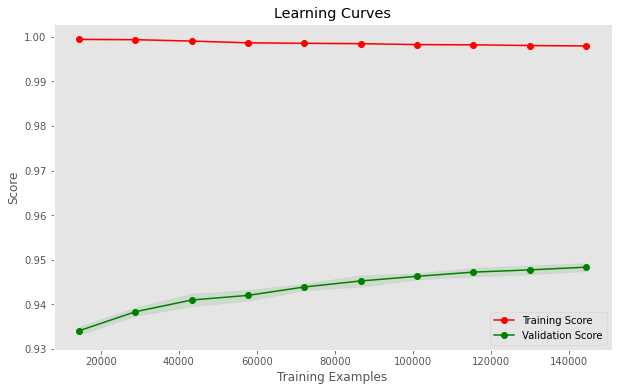

In [45]:
from sklearn.model_selection import learning_curve

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(rf_classifier, X_train, y_train, cv=5,
                                                       scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.title("Learning Curves")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Validation Score")
plt.legend(loc="best")
plt.show()

# Learning Curves (Accuracy/Loss vs Epoch)

In [ ]:
# Initialize lists to store training and validation accuracy
train_accuracy = []
val_accuracy = []

# Iterate over different numbers of epochs
for n_epochs in range(1, 101):
    # Train the classifier with the current number of epochs
    rf_classifier.set_params(n_estimators=n_epochs)
    rf_classifier.fit(X_train, y_train)
    
    # Compute training and validation accuracy
    train_pred = rf_classifier.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    val_pred = rf_classifier.predict(X_test)
    val_acc = accuracy_score(y_test, val_pred)
    
    # Append the accuracy values to the lists
    train_accuracy.append(train_acc)
    val_accuracy.append(val_acc)

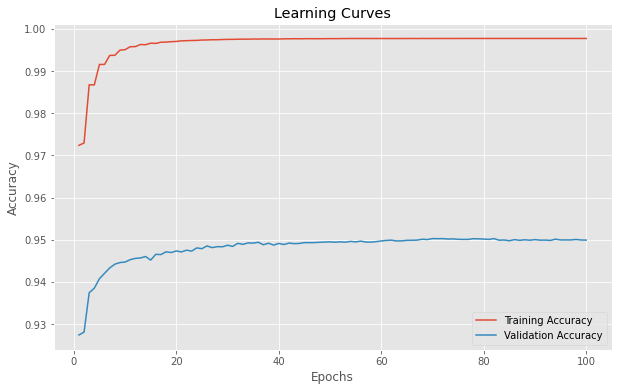

In [60]:
# Plot the learning curves
plt.figure(figsize=(10, 6))
epochs = range(1, 101)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

# Predictions and Accuracy Score

In [84]:
LabelsToClasses = {'Normal': 0,'Attack': 1}
ClassesToLabels = {0:'Normal', 1:'Attack'}

In [85]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from tabulate import tabulate

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier

train_score = rf_classifier.score(X_train, y_train)
accuracy = rf_classifier.score(X_test, y_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
support = np.sum(confusion_matrix(y_test, y_pred), axis=1)
    
table_data = [["Training score", train_score],
              ["Accuracy", accuracy],
              ["Precision", precision],
              ["Recall", recall],
              ["Support", support[1]]]

table_header = ["Metric", "Value"]
print(tabulate(table_data, headers=table_header))

Metric                 Value
--------------  ------------
Training score      0.997793
Accuracy            0.949393
Precision           0.962854
Recall              0.957747
Support         49393


# Classification Report

In [86]:
# Generate a classification report
report = classification_report(y_test, y_pred, target_names=ClassesToLabels.values())
print(report)

              precision    recall  f1-score   support

      Normal       0.93      0.93      0.93     27909
      Attack       0.96      0.96      0.96     49393

    accuracy                           0.95     77302
   macro avg       0.94      0.95      0.95     77302
weighted avg       0.95      0.95      0.95     77302



# Confusion Matrix

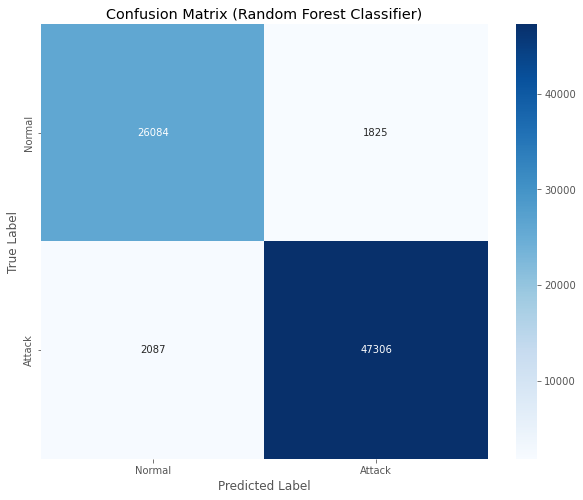

In [87]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", 
            xticklabels=list(LabelsToClasses.keys()),
            yticklabels=list(LabelsToClasses.keys()),)
plt.title("Confusion Matrix (Random Forest Classifier)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ROC-AUC Curve

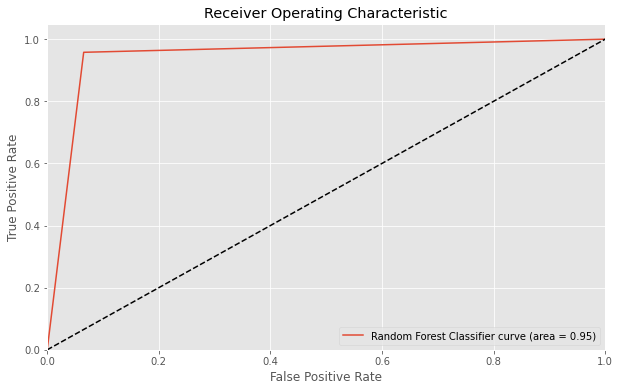

In [88]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Random Forest Classifier curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Feature Importances

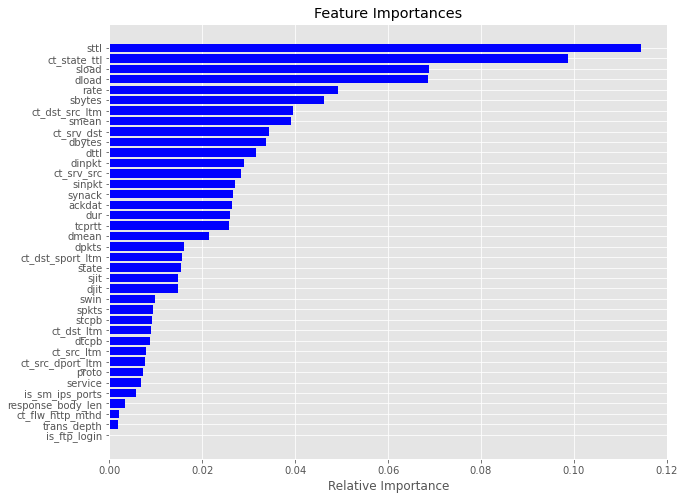

In [89]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)
features = feature_list
plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Explain Predictions (SHAP)

 97%|=================== | 194/200 [00:11<00:00]       

<Figure size 720x864 with 0 Axes>

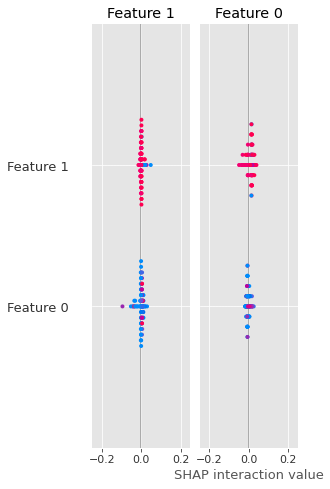

In [38]:
import shap

# Explain predictions using SHAP
explainer = shap.Explainer(rf_classifier, X_train)

# Compute SHAP values for 100 test data
shap_values = explainer(X_test[:100])

# Plot SHAP Explainer
plt.figure(figsize=(10, 12))
shap.summary_plot(shap_values, X_test[:100], plot_type='bar')
plt.show()


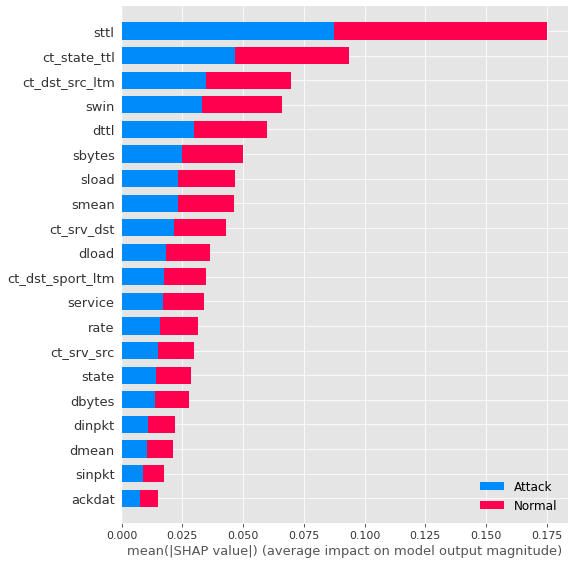

In [90]:
# Explain predictions using SHAP Tree
tree_explainer = shap.TreeExplainer(rf_classifier)

# Compute Tree SHAP values for 25 test data
tree_shap_values = tree_explainer.shap_values(X_test[:25])

# Plot SHAP Tree Explainer
plt.figure(figsize=(10, 12))
shap.summary_plot(tree_shap_values, X_test[:25], feature_names=feature_list, class_names=["Normal","Attack"])
plt.show()

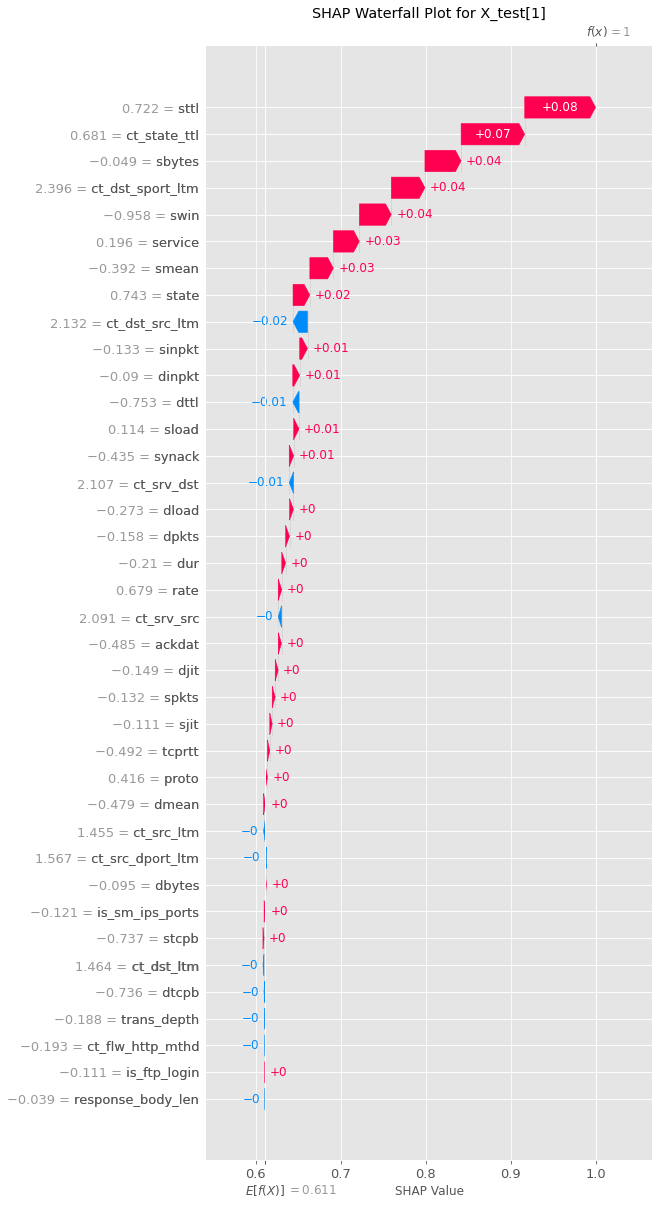

In [129]:
# Create the SHAP waterfall plot
exp = shap.Explanation(shap_values.values[:,:,1], 
                  shap_values.base_values[:,1], 
                  data=X_test, 
                  feature_names=feature_list)
idx = 1

# Set the title and axis labels
plt.figure(figsize=(16, 8))
plt.title('SHAP Waterfall Plot for X_test[{}]'.format(idx))
plt.xlabel('SHAP Value')
shap.plots.waterfall(exp[idx], max_display=40)
plt.show()


# Explain Predictions (Lime)

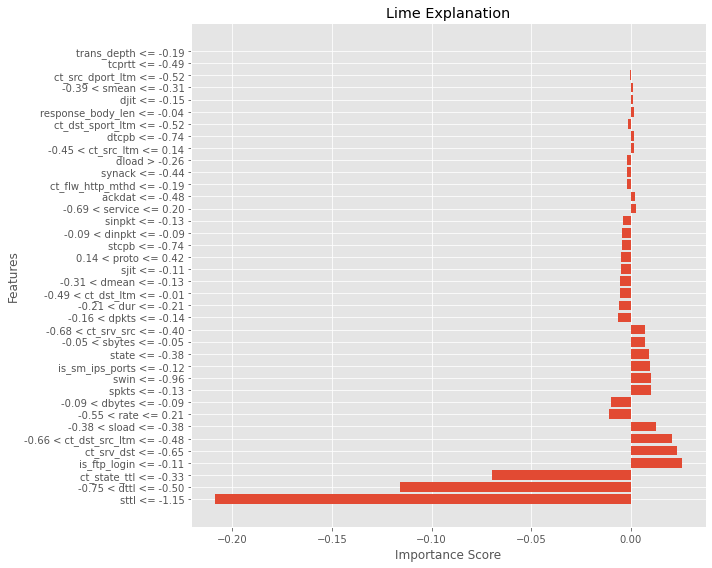

In [69]:
import lime
from lime import lime_tabular
from IPython.display import display, HTML

predict_fn_rf = lambda x: rf_classifier.predict_proba(x).astype(float)
explainer = lime.lime_tabular.LimeTabularExplainer(X_train,
                                                   feature_names = feature_list,
                                                   class_names=['Normal','Attack'],
                                                   kernel_width=5)

choosen_instance = X_test[10]
exp = explainer.explain_instance(choosen_instance, 
                                 predict_fn_rf,
                                 num_features=X_train.shape[1])


# Get the feature importance values and names
importance_values = exp.as_list()
features, importance_scores = zip(*importance_values)

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(features)), importance_scores, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Lime Explanation')
plt.tight_layout()
plt.show()

exp.show_in_notebook(show_all=False)


# # Print the explanations
# print("Lime Explainer (Kernels):")
# print(exp.as_list())

# ELI5

Explanation(estimator="PermutationImportance(estimator=RandomForestClassifier(random_state=42),\n                      random_state=42, scoring='accuracy')", description="\nFeature importances, computed as a decrease in score when feature\nvalues are permuted (i.e. become noise). This is also known as \npermutation importance.\n\nIf feature importances are computed on the same data as used for training, \nthey don't reflect importance of features for generalization. Use a held-out\ndataset if you want generalization feature importances.\n", error=None, method='feature importances', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='ct_srv_src', weight=0.046492975602183684, std=0.00027925581673075335, value=None), FeatureWeight(feature='dtcpb', weight=0.022002018059041183, std=0.00034327718901186563, value=None), FeatureWeight(feature='smean', weight=0.012959561201521353, std=0.00015271381918576657, value=None), FeatureWeight(fe

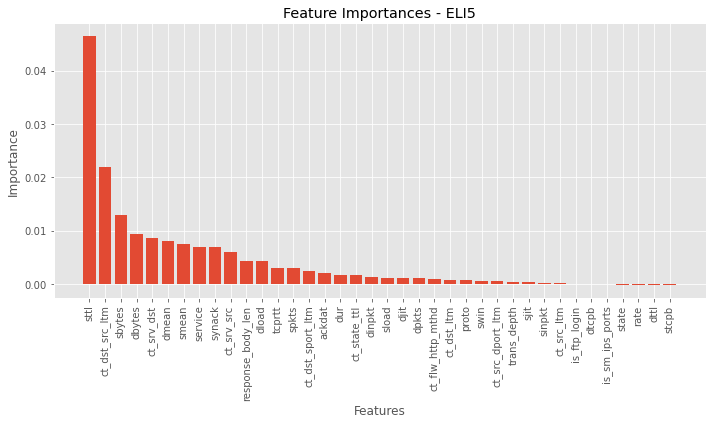

In [40]:
import eli5
from eli5.sklearn import PermutationImportance
import numpy as np
import matplotlib.pyplot as plt

# Create the ELI5 explainer
explainer = PermutationImportance(rf_classifier, scoring='accuracy', random_state=42)

# Fit the explainer on the test data
explainer.fit(X_test, y_test)

# Get feature importances from the explainer
importances = explainer.feature_importances_
feature_names = np.array(feature_list)  # Replace with actual feature names

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
sorted_feature_names = feature_names[indices]
sorted_importances = importances[indices]

# Generate explanations
explanations = eli5.explain_weights(explainer, feature_names=sorted_feature_names)

# Print explanations
print(explanations)

# Plot the feature importances
plt.figure(figsize=(10, 6))  # Adjust the figsize parameter as desired
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances - ELI5')
plt.tight_layout()
plt.show()